In [1]:
import matplotlib.pyplot as plt
a1=3.9
num_iterations=6000
b1=0.04
u=0.001
g1=0.5
xrev=1.2
a2=3.9
b2=0.04
g2=0
x1th=1
x2th=0.5
d=0

In [2]:
def SingleRulkovNeuron(X, xn, a, b, g, d, xth):
    x, y = X
    xn = fun(x, y, a)+ChemicalSynapse(x, xn, g, xth)+ElectricSynapse(x,xn, d)
    yn = y - u * (x + 1) + u * b
    return xn, yn

In [3]:
def fun(x, y, a):
    if x <= 0:
        return (a/(1-x)+y)
    elif (x>0) and (x <a+y):
        return (a + y)
    elif (x>=a+y):
        return (-1)

In [4]:
def ChemicalSynapse(x1, xn2, g, xth):
    if(xn2>xth):
        return g*1*(xrev+x1)
    else:
        return 0

In [5]:
def ElectricSynapse(x1, xn2, d):
        return d*(xn2-x1)

In [6]:
X01 = [0, 0]
X02 = [0, 0]
xn1=0
xn2=0
X1, Y1, Z1 = [], [], []
X2, Y2, Z2 = [], [], []
for i in range(2000):
    xn1, yn1 = SingleRulkovNeuron(X01, xn2, a1, b1, g1, d, x2th)
    xn2, yn2 = SingleRulkovNeuron(X02, xn1, a2, b2, g2, d, x1th)
    X1, Y1, Z1 = X1 + [xn1], Y1 + [yn1], Z1+[i]
    X2, Y2, Z2 = X2 + [xn2], Y2 + [yn2], Z2+[i]
    X01 = [xn1, yn1]
    X02 = [xn2, yn2]

In [7]:
X1, Y1, Z1 = [], [], []
X2, Y2, Z2 = [], [], []
for i in range(num_iterations):
    xn1, yn1 = SingleRulkovNeuron(X01, xn2, a1, b1, g1, d, x2th)
    xn2, yn2 = SingleRulkovNeuron(X02, xn1, a2, b2, g2, d, x1th)
    X1, Y1, Z1 = X1 + [xn1], Y1 + [yn1], Z1+[i]
    X2, Y2, Z2 = X2 + [xn2], Y2 + [yn2], Z2+[i]
    X01 = [xn1, yn1]
    X02 = [xn2, yn2]

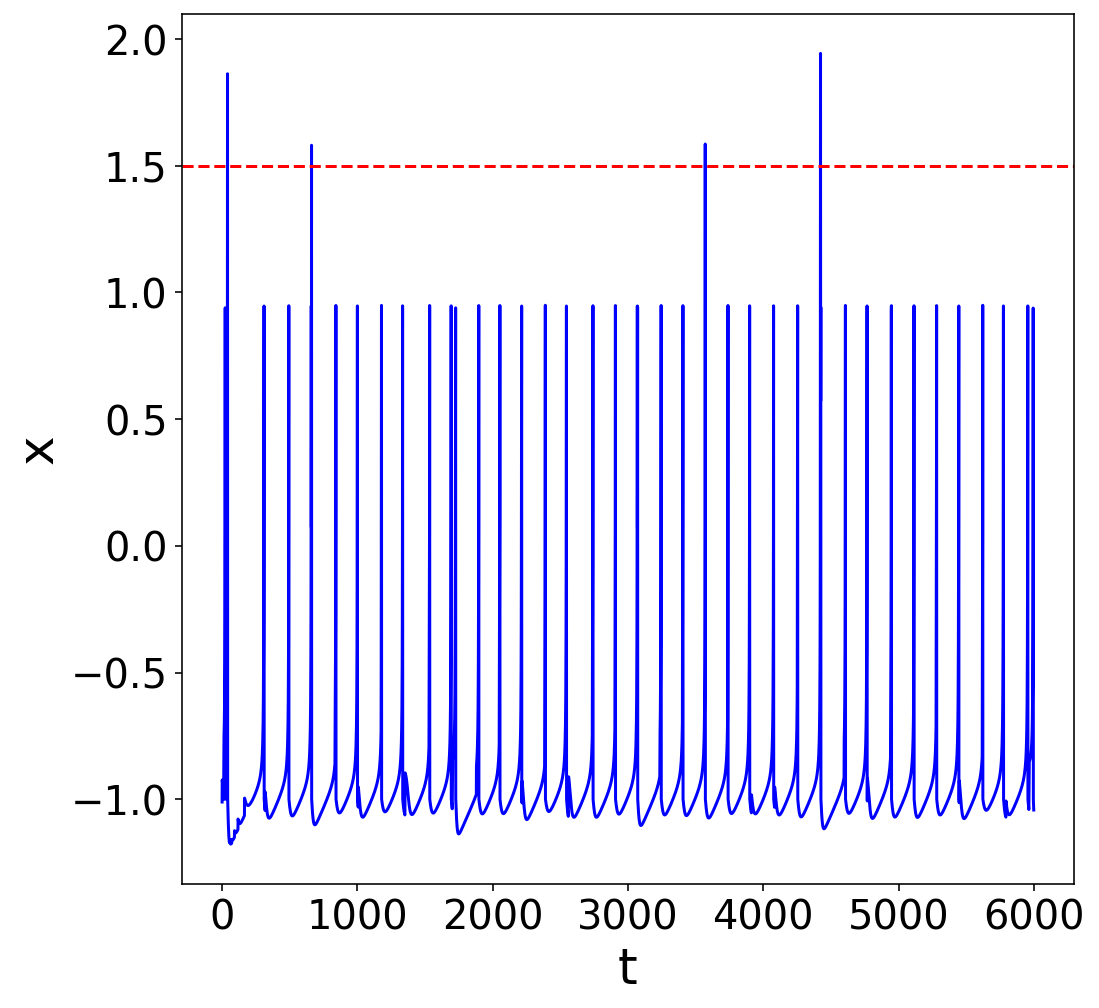

In [8]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(Z1, X1, color = 'blue')
plt.xlabel('t', fontsize=25)
plt.ylabel('x', fontsize=25)
plt.tick_params(labelsize=20)
plt.axhline(y = 1.5, color ="red", linestyle ="--")
plt.show()

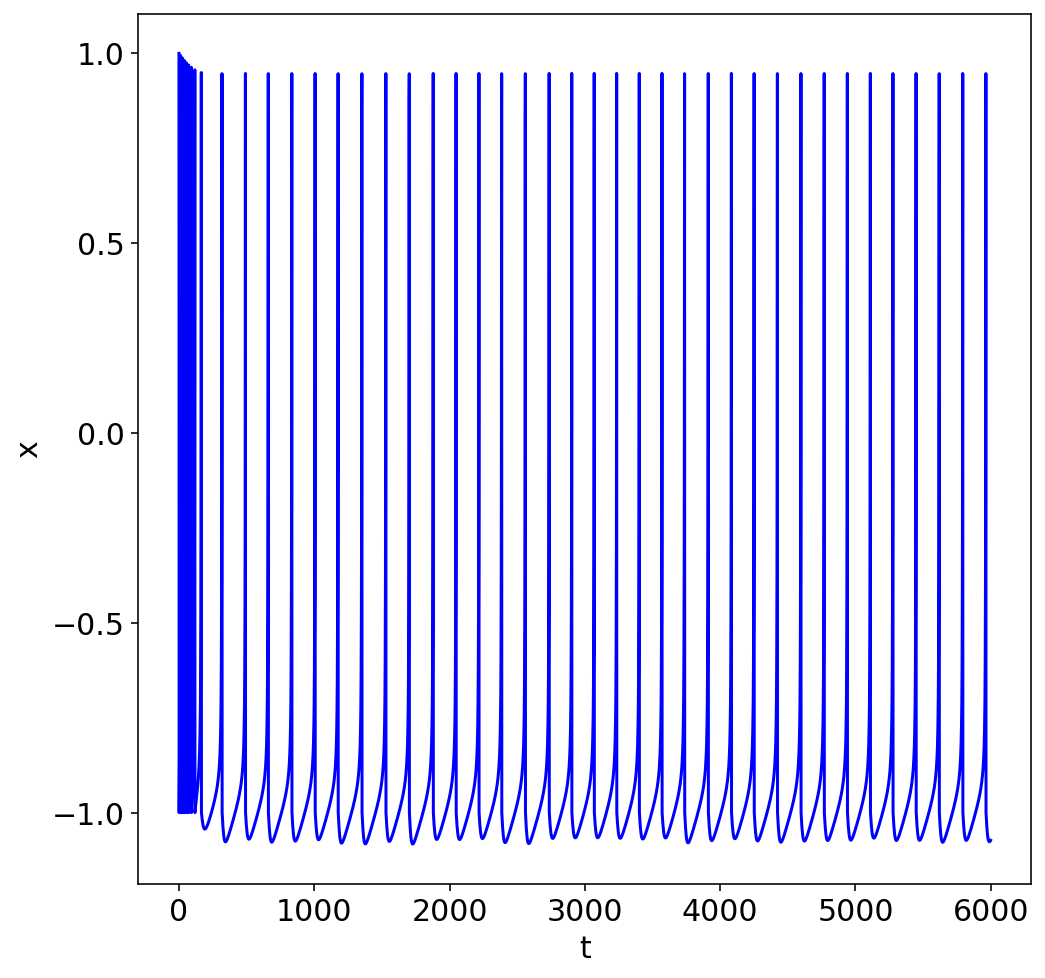

In [9]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(Z2, X2, color = 'blue')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()